<a href="https://colab.research.google.com/github/EStalei/IC/blob/main/chess_eike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho final - Etapa 1**

**Disciplina: Tópicos em Inteligência Computacional**

Instituto Federal do Norte de Minas Gerais Campus Montes Claros

Curso: Ciência da Computação

Professora: Luciana Balieiro Cosme

Aluno: Eike Stálei Vieira Neves


* [DATABASE CHESS](https://www.kaggle.com/datasnaek/chess)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np
import pandas
from sklearn import linear_model
from statsmodels.stats.diagnostic import normal_ad
from sklearn.metrics import r2_score

uploaded = files.upload()
dt = pd.read_csv(io.BytesIO(uploaded['games.csv']))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving games.csv to games (3).csv


In [ ]:
dt.shape

(20058, 16)

In [ ]:
dt.columns[0:16]

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [82]:
games = pandas.DataFrame(dt, columns=['victory_status','turns', 'winner', 'black_id','white_id','black_rating', 'white_rating'])
games.head()
games.sort_values(by=['turns'], ascending = False)

,victory_status,turns,winner,black_id,white_id,black_rating,white_rating
13859,outoftime,349,white,kijek,shiwen,2240,2194
11554,outoftime,349,white,kijek,shiwen,2240,2194
16386,draw,259,draw,lone-wolf,aragon26,1461,1441
4236,draw,255,draw,kasparovd0311,manipin,1448,1585
16645,draw,226,draw,jhonthoth,chunnev,1907,1817
...,...,...,...,...,...,...,...
18583,resign,1,white,usa-04071776,adriansywu,1367,1431
1977,outoftime,1,white,tactical_bishop,clarkkent89,1223,2032
13701,resign,1,black,kaskade24,networkchess2,1860,1878
5496,outoftime,1,white,ytdvvc,slowgamer,1404,2100


In [ ]:
games['black_rating'].describe()

count    20058.000000
mean      1588.831987
std        291.036126
min        789.000000
25%       1391.000000
50%       1562.000000
75%       1784.000000
max       2723.000000
Name: black_rating, dtype: float64

In [ ]:
games['white_rating'].describe()

count    20058.000000
mean      1596.631868
std        291.253376
min        784.000000
25%       1398.000000
50%       1567.000000
75%       1793.000000
max       2700.000000
Name: white_rating, dtype: float64

In [ ]:
print('Maior rating de um jogador de peças brancas: ', games['white_rating'][games['white_rating'].idxmax()])
print('Maior rating de um jogador de peças pretas: ', games['black_rating'][games['black_rating'].idxmax()])

print('indice do maior rating preto: ', games['black_rating'].idxmax())
print('indice do maior rating branco: ', games['white_rating'].idxmax())

print('jogador com maior rating jogando com peças pretas: ',games['black_id'][games['black_rating'].idxmax()])
print('Jogador com maior rating jogando com peças brancas: ',games['white_id'][games['white_rating'].idxmax()])

Maior rating de um jogador de peças brancas:  2700
Maior rating de um jogador de peças pretas:  2723
indice do maior rating preto:  4473
indice do maior rating branco:  13009
jogador com maior rating jogando com peças pretas:  justicebot
Jogador com maior rating jogando com peças brancas:  justicebot


In [ ]:
games['turns'].describe()

#print('Media de turnos: ', games['turns'].)

count    20058.000000
mean        60.465999
std         33.570585
min          1.000000
25%         37.000000
50%         55.000000
75%         79.000000
max        349.000000
Name: turns, dtype: float64

In [83]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

winner = le.fit_transform(games['winner'])
games['y'] = winner

victory_status = le.fit_transform(games['victory_status'])
games['status'] = victory_status

games.head(10)

,victory_status,turns,winner,black_id,white_id,black_rating,white_rating,y,status
0,outoftime,13,white,a-00,bourgris,1191,1500,2,2
1,resign,16,black,skinnerua,a-00,1261,1322,0,3
2,mate,61,white,a-00,ischia,1500,1496,2,1
3,mate,61,white,adivanov2009,daniamurashov,1454,1439,2,1
4,mate,95,white,adivanov2009,nik221107,1469,1523,2,1
5,draw,5,draw,franklin14532,trelynn17,1002,1250,1,0
6,resign,33,white,daniel_likes_chess,capa_jr,1423,1520,2,3
7,resign,9,black,soultego,daniel_likes_chess,2108,1413,0,3
8,resign,66,black,daniel_likes_chess,ehabfanri,1392,1439,0,3
9,mate,119,white,mirco25,daniel_likes_chess,1209,1381,2,1


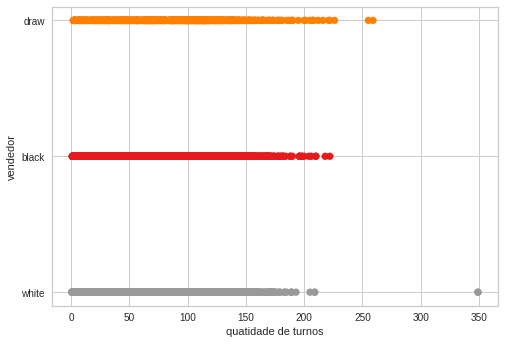

In [85]:
import matplotlib.pyplot as plt 

plt.subplots()
plt.scatter(games['turns'], games['winner'], c=games['y'], cmap=plt.cm.Set1)
plt.xlabel('quatidade de turnos')
plt.ylabel('vendedor')
plt.grid(True)
plt.show()


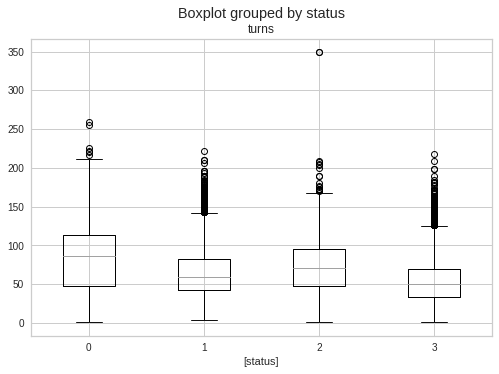

In [90]:
nsoqeisso = pandas.DataFrame(games, columns=['status', 'turns'])
nsoqeisso.boxplot(by='status')

#0 draw
#1 mate
#2 outoftime
#3 resign

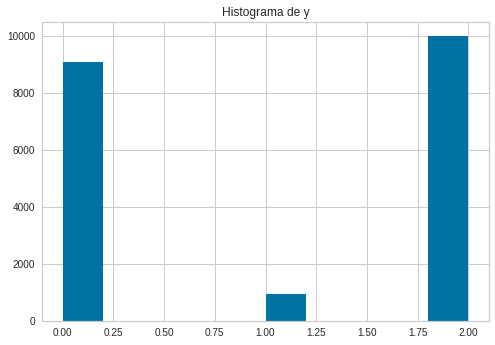

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
y = games['y']

plt.hist(y)
plt.title('Histograma de y')
plt.show()


X = games['turns']
X_treinamento = X[:-200].array.to_numpy().reshape(-1,1)
X_teste = X[-200:].array.to_numpy().reshape(-1,1)

y_treinamento = y[:-200]
y_teste = y[-200:].array.to_numpy().reshape(-1,1)


regr = linear_model.LinearRegression()

regr.fit(X_treinamento, y_treinamento)

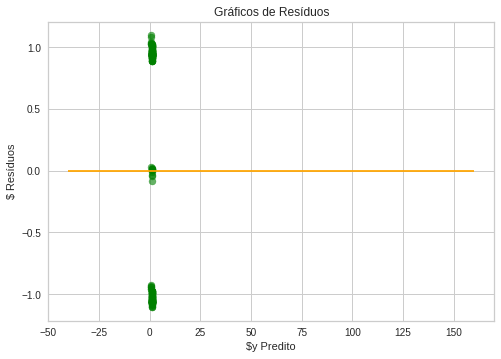

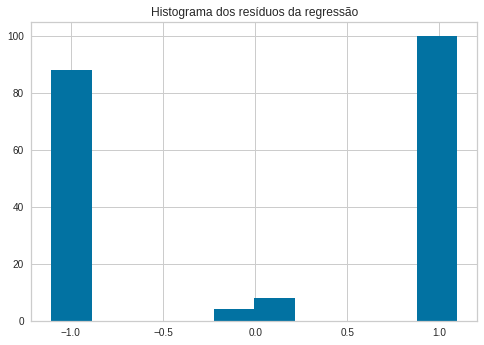


 R2: 0.006364536942842669


In [94]:
#Tentando usar regressão linear

games_y_pred = regr.predict(X_teste)

res = y_teste - games_y_pred.reshape(-1,1)

plt.scatter(y=res, x=games_y_pred, color='green', s=50, alpha=.6)
plt.hlines(y=0, xmin=-40, xmax=160, color='orange')
plt.ylabel('$ Resíduos')
plt.xlabel('$y Predito')
plt.title ('Gráficos de Resíduos')
plt.show()

plt.hist(res)
plt.title('Histograma dos resíduos da regressão')
plt.show()

#p_value = normal_ad(res)[1]
#print('\n p-value abaixo 0.05 geralmente significa não normal:', round(p_value[0],2))

print('\n R2:', r2_score(y_teste, games_y_pred))